Number of C-alpha atoms in AF2 Chain A: 374
Number of C-alpha atoms in AF3 Chain A: 513
Number of common residues: 374


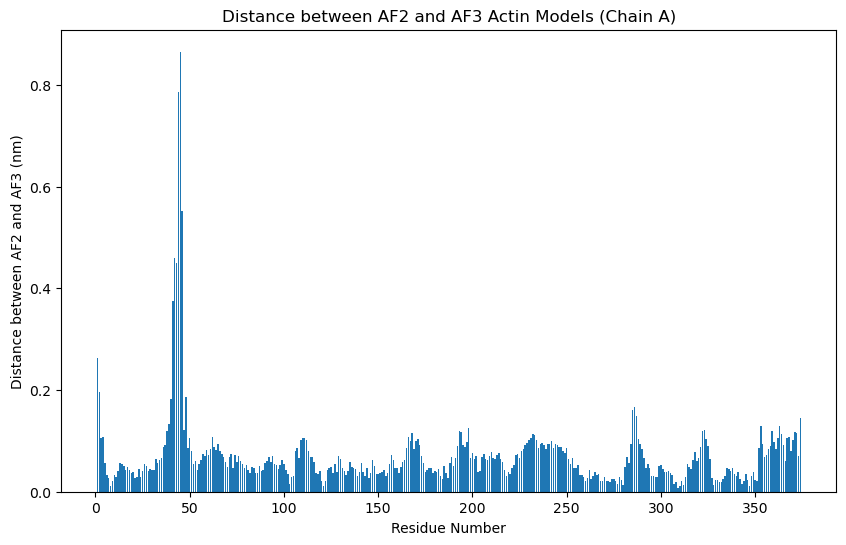

Residues with large differences: [41 42 43 44 45 46]


In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load AF2 and AF3 models (Actin, Chain A)
af2 = md.load('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week7-Alphafold/Input/2btf/AF2/2btf_923b1_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb')
af3 = md.load('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week7-Alphafold/Input/2btf/AF3-ATP/fold_2024_10_17_17_24_model_0.cif')

# Select only chain A from both models
af2_chain_a = af2.atom_slice(af2.topology.select('chainid 0 and name CA'))
af3_chain_a = af3.atom_slice(af3.topology.select('chainid 0 and name CA'))

# Print the number of C-alpha atoms selected from AF2 and AF3
print(f"Number of C-alpha atoms in AF2 Chain A: {af2_chain_a.n_atoms}")
print(f"Number of C-alpha atoms in AF3 Chain A: {af3_chain_a.n_atoms}")

# If the number of C-alpha atoms doesn't match, we need to find common residues
af2_residues = [res.index for res in af2_chain_a.topology.residues]
af3_residues = [res.index for res in af3_chain_a.topology.residues]
common_residues = set(af2_residues).intersection(af3_residues)

print(f"Number of common residues: {len(common_residues)}")

# Select atoms corresponding to common residues from both AF2 and AF3
af2_common = af2_chain_a.atom_slice([atom.index for atom in af2_chain_a.topology.atoms if atom.residue.index in common_residues])
af3_common = af3_chain_a.atom_slice([atom.index for atom in af3_chain_a.topology.atoms if atom.residue.index in common_residues])

# Align AF3 to AF2 using the common residues
af3_common.superpose(af2_common)

# Compute the distance between corresponding residues
distances = np.linalg.norm(af2_common.xyz[0] - af3_common.xyz[0], axis=1)

# Plot the distances as a bar chart
residue_numbers = np.arange(1, len(distances) + 1)

plt.figure(figsize=(10, 6))
plt.bar(residue_numbers, distances)
plt.xlabel('Residue Number')
plt.ylabel('Distance between AF2 and AF3 (nm)')
plt.title('Distance between AF2 and AF3 Actin Models (Chain A)')
plt.show()

# Analyze the regions with large distances
large_distance_threshold = 0.3  # You can adjust this threshold
different_regions = np.where(distances > large_distance_threshold)[0]
print(f"Residues with large differences: {different_regions + 1}")  # Add 1 to match residue numbering

# Optional: Save the distances and residue numbers for further analysis
np.savetxt('af2_af3_distances.txt', np.c_[residue_numbers, distances], header='ResidueNumber Distance(nm)', fmt='%d %.4f')
